In [1]:
%reset -f
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random
import sys
import seaborn as sns  
# sys.path.append('C:\Users\mahal\Thesis_code\oscillations-and-memory')
import gating_variables as gate
import init_regimes as Init

In [2]:
def generatespikes(V_pre, V_th, T, dt):
    '''
    INPUT:
    V_th: voltage threshold for spike detection
    V_pre: input voltage to assess the spike times
    T: duration of simulation in seconds
    dt: timestep in seconds
    
    OUTPUT:
    spike_train: spikes represented visually (0 or 1)
    spike: spike times
    '''
    spike = []
    spike_train = np.zeros(len(T))
    i = 0

    while i < len(T):
        if V_pre[i] >= V_th:
            spike.append(i * dt)  # Record the spike time
            spike_train[i] = 1  # Mark the spike in the spike train
            i += 200  # Skip ahead to avoid counting the same spike multiple times
        i += 1

    # Convert spike list to numpy array
    spike = np.array(spike)

    return spike_train, spike

In [3]:
### important - what does k =0 stand for in isolated TC and TRN cases?: check this


#### Write down an agenda for how to approach multiple 2 cell circuits 
    ###simulations: downstate to TC initiation [ multi-units simulate only introducing diversity in different cells 
    ###and get plot for both thalamic and TRN spike activity relative to cortical downstate

    ### How many units? - 
    ### hOW to introduce variability --> changing I_T and I_h. How do we want to change these values?? ( test runs)

In [4]:
def generateOscillationsTRN_TC(I_TRN, I_TC,T,C_m,dt,regime_name_TRN, regime_name_TC, manipulation,k, modify_AMPA = False):
        
    
        allvariables_TRN={}
        allvariables_TC={}
    
        
        g_Na_TRN, g_K_TRN, g_T_TRN, g_L_TRN, I_bg_TRN, V_Na_TRN, V_K_TRN, V_T_TRN, V_L_TRN, V_TRN, I_K_TRN, I_Na_TRN, I_L_TRN, I_T_TRN, n_TRN, m_TRN, h_TRN, m_Ca, h_Ca = Init.init_isolated_TRN(T,  regime_name_TRN, k) 
        # print(g_Na_TRN, g_K_TRN, g_T_TRN, g_L_TRN, I_bg_TRN, V_Na_TRN, V_K_TRN, V_T_TRN, V_L_TRN, V_TRN, I_K_TRN, I_Na_TRN, I_L_TRN, I_T_TRN, n_TRN, m_TRN, h_TRN, m_Ca, h_Ca)

        g_Na_TC, g_K_TC, g_T_TC, g_L_TC, I_bg_TC, g_H, g_KL_TC,  V_Na_TC, V_K_TC, V_T_TC, V_L_TC, V_H, V_KL_TC, V_TC, I_K_TC, I_Na_TC, I_L_TC, I_T_TC,I_H_TC, I_KL_TC, n_TC, m_TC, h_TC, m_Ca_TC, h_Ca_TC, S_H_TC, F_H_TC = Init.init_isolated_TC(T, regime_name_TC, k) 
        # print(regime_name_TC)
        # print(g_Na_TC, g_K_TC, g_T_TC, g_L_TC, I_bg_TC, g_H, g_KL_TC,  V_Na_TC, V_K_TC, V_T_TC, V_L_TC, V_H, V_KL_TC, V_TC, I_K_TC, I_Na_TC, I_L_TC, I_T_TC,I_H_TC, I_KL_TC, n_TC, m_TC, h_TC, m_Ca_TC, h_Ca_TC, S_H_TC, F_H_TC)
        g_GABAa, g_GABAb, g_AMPA, s_GABAa, s_AMPA, g,r,k1, k2,k3, k4, V_GABAa, V_AMPA, V_GABAb, tau_GABAa, tau_AMPA = Init.init_synaptic(T, manipulation)

        # if len(g_GABAb) >= 1:
        #         for k in len(g_GABAb):
        #                 g_GABAb=g_GABAb[k]

        # defining syaptic variables

        I_GABAb=np.zeros(len(T))
        I_GABAa=np.zeros(len(T))
        I_AMPA=np.zeros(len(T))

        ''' need to fix this'''
        # print(g_L_TRN)
        # I=I

        
        #### loop connecting TC and TRN

        for i in range(len(T)-1):

                #### TRN values

                I_K_TRN[i]= g_K_TRN*np.power(n_TRN[i],4)*(V_TRN[i]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

                I_Na_TRN[i]=g_Na_TRN*np.power(m_TRN[i],3)*h_TRN[i]*(V_TRN[i]-V_Na_TRN)/C_m

                I_L_TRN[i]=g_L_TRN*(V_TRN[i]-V_L_TRN)/C_m

                I_T_TRN[i]=g_T_TRN*np.power(m_Ca[i],2)*h_Ca[i]*(V_TRN[i]-V_T_TRN)/C_m
              
                if modify_AMPA == True:
                        # print("entered this loop")
                        if g_H == 0.017 and int(500 / dt) < i < int(580 / dt):
                                # print(i)  # Adjusted for readability
                                modification_factor = 2 
                                # print("enter when gH is 0.017") # Representing the division by 2
                        else:
                                modification_factor = 1  # No modification
                else:
                        modification_factor = 1

                print(modification_factor)
                I_AMPA[i] = (g_AMPA * s_AMPA[i] * (V_TRN[i] - V_AMPA) / C_m) / modification_factor

                

                V_TRN[i+1]=(I_TRN[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i]- I_AMPA[i])*dt+V_TRN[i]

                s_AMPA[i+1]= ((5*(1+math.tanh(V_TC[i]/4))*(1-s_AMPA[i]) - s_AMPA[i]/tau_AMPA)) * dt + s_AMPA[i]
                
                n_TRN[i+1]=-(n_TRN[i]-gate.n_inf(V_TRN[i]))*dt/gate.tau_n(V_TRN[i]) +n_TRN[i]

                m_TRN[i+1]=-(m_TRN[i]-gate.m_inf(V_TRN[i]))*dt/gate.tau_m(V_TRN[i]) +m_TRN[i]

                h_TRN[i+1]=-(h_TRN[i]-gate.h_inf(V_TRN[i]))*dt/gate.tau_h(V_TRN[i]) +h_TRN[i]

                m_Ca[i+1]=-(m_Ca[i]-gate.m_Ca_inf(V_TRN[i]))*dt/gate.tau_m_Ca(V_TRN[i]) +m_Ca[i]

                h_Ca[i+1]=-(h_Ca[i]-gate.h_Ca_inf(V_TRN[i]))*dt/gate.tau_h_Ca(V_TRN[i]) +h_Ca[i]    


                ### TC values

                I_K_TC[i]= g_K_TC*np.power(n_TC[i],4)*(V_TC[i]-V_K_TC)/C_m

                I_Na_TC[i]=g_Na_TC*np.power(m_TC[i],3)*h_TC[i]*(V_TC[i]-V_Na_TC)/C_m

                I_L_TC[i]=g_L_TC*(V_TC[i]-V_L_TC)/C_m

                I_KL_TC[i]=g_KL_TC*(V_TC[i]-V_KL_TC)/C_m

                I_T_TC[i]=g_T_TC*np.power(m_Ca_TC[i],2)*h_Ca_TC[i]*(V_TC[i]-V_T_TC)/C_m

                I_H_TC[i]=g_H*S_H_TC[i]*F_H_TC[i]*(V_TC[i]-V_H)/C_m
                
                I_GABAb[i]= g_GABAb*((np.power(g[i],4))/(np.power(g[i],4)+100))*(V_TC[i]-V_GABAb)/C_m

                I_GABAa[i]= g_GABAa*s_GABAa[i]*(V_TC[i]-V_GABAa)/C_m

                
                # I_tot_TC[i+1]= I_K_TC[i]+I_Na_TC[i]+I_L_TC[i]+I_T_TC[i]+I_H_TC[i]+I_GABAb[i] + I_GABAa[i]

                # I_tot_TC_wsyn[i+1]= I_K_TC[i]+I_Na_TC[i]+I_L_TC[i]+I_T_TC[i]+I_H_TC[i] 

                # I_syn_TC[i+1]= I_GABAb[i] + I_GABAa[i]

                V_TC[i+1]=(I_TC[i]/C_m-I_K_TC[i]-I_Na_TC[i]-I_L_TC[i]-I_T_TC[i]-I_H_TC[i]-I_GABAb[i] - I_GABAa[i] -I_KL_TC[i])*dt+V_TC[i]           
                        
                r[i+1]= (k1*2*(1+math.tanh(V_TRN[i]/4))*(1-r[i])-k2*r[i])*dt + r[i]  # check how to represent these equations with Jorge
                
                g[i+1]= (k3*r[i] - k4*g[i])*dt +g[i]

                s_GABAa[i+1]= ((5*(1+math.tanh(V_TRN[i]/4))*(1-s_GABAa[i]) - s_GABAa[i]/tau_GABAa)) * dt + s_GABAa[i]
        
                n_TC[i+1]=-(n_TC[i]-gate.n_inf(V_TC[i]))*dt/gate.tau_n(V_TC[i]) +n_TC[i]

                m_TC[i+1]=-(m_TC[i]-gate.m_inf(V_TC[i]))*dt/gate.tau_m(V_TC[i]) +m_TC[i]

                h_TC[i+1]=-(h_TC[i]-gate.h_inf(V_TC[i]))*dt/gate.tau_h(V_TC[i]) +h_TC[i]

                m_Ca_TC[i+1]= gate.m_Ca_TC_inf(V_TC[i+1])

                h_Ca_TC[i+1]=-(h_Ca_TC[i]-gate.h_Ca_TC_inf(V_TC[i]))*dt/gate.tau_Ca_TC_h(V_TC[i]) +h_Ca_TC[i]

                S_H_TC[i+1]= -(S_H_TC[i]-gate.H_TC_inf(V_TC[i]))*dt/gate.tau_H_S(V_TC[i]) + S_H_TC[i]

                F_H_TC[i+1]= -(F_H_TC[i]-gate.H_TC_inf(V_TC[i]))*dt/gate.tau_H_F(V_TC[i]) + F_H_TC[i]

        
        allvariables_TRN = {'Injected current (μA)': I_TRN, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_AMPA': I_AMPA, 's_AMPA': s_AMPA} 
#         allvariables= {'Injected current (nA)': I, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN } 
        allvariables_TC = {'Injected current (μA)': I_TC, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC,'I_h (nA)':I_H_TC, 'slow state variable': S_H_TC, 'fast state variable':F_H_TC, 'Membrane potential (mV)':V_TC, 'I_GABAa': I_GABAa, 'I_GABAb': I_GABAb }
        
        return allvariables_TRN, allvariables_TC



In [5]:
def generateOscillations_nTRN_nTC(I_TC, I_TRN,T,C_m,dt,n):
        
    
    allvariables_nTRN={}
    allvariables_nTC={}

    
    g_Na_TC=90  #90, destexhe93--> 30
    g_K_TC=10
    g_T_TC=2 #destexhe93--> 1.75
    g_H=0.015#use 0 to remove influence of Ih current,otherwise use 0.015 # DEPENDS??? changed from 0.025 on 8/3/2022 (switch between 0.001 and 0.015) (destexhe93 --> 0.12)
    g_L_TC=0.01 # 0.01 leads to overflow/ changed from 0.001 to 0.01 on 8 March 2022 (Destexhe93-- 0.05)
    # g_KL_TC= 0.0172 #(for a maximal conductance of 5 nS)
    g_KL_TC= 0



    V_Na_TC=50
    V_K_TC=-100
    V_H=-43 #mV
    V_L_TC=-70 #Destxhe93 = -86
    V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
    V_KL_TC= -100


    # membrane potential at each time point
    V_TC=np.zeros((len(T),n))
    V_TC[0,:]=-60   # changed from -60 to -55 on 8/3/2022 as the steady state value in isolated TRN is around -54
    

    # current contributed by ion channels in each time point 
    I_K_TC=np.zeros((len(T),n)) # Potassium
    I_Na_TC=np.zeros((len(T),n)) # Sodium
    I_L_TC=np.zeros((len(T),n))  # Leaky channels
    I_H_TC=np.zeros((len(T),n))
    I_T_TC=np.zeros((len(T),n))
    I_KL_TC= np.zeros((len(T),n))
    I_GABAb= np.zeros((len(T),n))
    I_GABAa=np.zeros((len(T),n))

    # open probabilities of each channel gates at each time point
    n_TC=np.zeros((len(T),n))
    m_TC=np.zeros((len(T),n))
    h_TC=np.zeros((len(T),n))
    S_H_TC=np.zeros((len(T),n))
    F_H_TC=np.zeros((len(T),n))
    
    tau_TC=np.zeros((len(T),n))
       
    
    # state variables for synaptic current from TRN to TC
    g_GABAb=np.zeros((n))  # 25-05-22
    g_GABAb[0]= 0.01 
    g_GABAb[1]= 0.008 # keep it same for symmetric connection and make one value 80% of the other for non-symmetric # 80% of above           #  0.001 mS/cm^2 ---.  ''' increase GABAb to see if that allows bursting in TC without an external pulse ''' (Destexhe93 - 4 nS, or 0.013 mS/cm2)
    V_GABAb= -95 #mV

    g=np.zeros((len(T),n))
    r=np.zeros((len(T),n))

    g[0,:]=0
    r[0,:]=0

    
    #state varaible equation (r,g)
    k1= 0.5 #(mM^-1 ms^-1)
    k2=0.0012 #(ms^-1)
    k3=0.18 #(ms^-1)
    k4= 0.034 #(ms^-1)
    
    
    #TRN cells Note: TRN and TC cells have the same Na and K channel kinetics according to Austin Soplata 2017 /................

    #initial rate values for K and Na rate equations
    n_TC[0]=gate.alpha_n_TRN(V_TC[0])/(gate.alpha_n_TRN(V_TC[0])+gate.beta_n_TRN(V_TC[0]))
    m_TC[0]=gate.alpha_m_TRN(V_TC[0])/(gate.alpha_m_TRN(V_TC[0])+gate.beta_m_TRN(V_TC[0]))
    h_TC[0]=gate.alpha_h_TRN(V_TC[0])/(gate.alpha_h_TRN(V_TC[0])+gate.beta_h_TRN(V_TC[0]))
    alpha_S_TC_0= gate.H_TC_inf(V_TC[0])/gate.tau_H_S(V_TC[0])
    beta_S_TC_0= (1-gate.H_TC_inf(V_TC[0]))/gate.tau_H_S(V_TC[0])
    S_H_TC[0]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

    alpha_F_TC_0= gate.H_TC_inf(V_TC[0])/gate.tau_H_F(V_TC[0])
    beta_F_TC_0= (1-gate.H_TC_inf(V_TC[0]))/gate.tau_H_F(V_TC[0])
    F_H_TC[0]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)
    

    #initial rate values for 
    m_Ca_TC=np.zeros((len(T),n))
    h_Ca_TC=np.zeros((len(T),n))

    m_Ca_TC[0,:]=gate.m_Ca_TC_inf(0)
    h_Ca_TC[0,:]=gate.h_Ca_TC_inf(0)

    
    ### TRN defining and initialising values:

    g_Na_TRN=200   # Na+ channels (200- destexhe93- 100)
    g_K_TRN=20  # K+ channels ( 15,20,25)
    g_L_TRN= 0.09 #0.3   # leaky channels (destexhe93- 0.05)
    g_T_TRN=3 # the T type calcium channel (destexhe93- 1.75)
    
    g_CAN= 0.25 #mS/cm^2
    V_CAN=-20 #mV
    
    g_K_Ca= 10 #mS/cm^2
    V_K_Ca=-95 #mV

    Ca_conc=np.zeros((len(T),n))
    Ca_conc[0,:]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.

    
    # Initiatlise ionic reversal potential (in mV)
    V_Na_TRN=50 # Na+ channels
    V_K_TRN=-100 # K+ channels
    V_L_TRN=-77  # leaky channels, implementing Bazhenov 2002 value =-77 from -90 on 8/3/2022 (destexhe93: -80)
    V_T_TRN=120
    
    V_TRN=np.zeros((len(T),n))
    V_TRN[0,:]=-60
    

    # current contributed by ion channels in each time point 
    I_K_TRN=np.zeros((len(T),n)) # Potassium
    I_Na_TRN=np.zeros((len(T),n)) # Sodium
    I_L_TRN=np.zeros((len(T),n)) # Leaky channels
    I_T_TRN=np.zeros((len(T),n))
    I_K_Ca=np.zeros((len(T),n))
    I_CAN=np.zeros((len(T),n))
    I_AMPA=np.zeros((len(T),n))
    I_GABAaTRN=np.zeros((len(T),n))
    
    
    n_TRN=np.zeros((len(T),n))
    m_TRN=np.zeros((len(T),n))
    h_TRN=np.zeros((len(T),n))

    #initial rate values for K and Na rate equations
    n_TRN[0]=gate.alpha_n_TRN(V_TRN[0])/(gate.alpha_n_TRN(V_TRN[0])+gate.beta_n_TRN(V_TRN[0]))
    m_TRN[0]=gate.alpha_m_TRN(V_TRN[0])/(gate.alpha_m_TRN(V_TRN[0])+ gate.beta_m_TRN(V_TRN[0]))
    h_TRN[0]=gate.alpha_h_TRN(V_TRN[0])/(gate.alpha_h_TRN(V_TRN[0])+gate.beta_h_TRN(V_TRN[0]))

    #initial rate values for 
    m_Ca=np.zeros((len(T),n))
    h_Ca=np.zeros((len(T),n))
    m_Ca[0,:]=gate.m_Ca_inf(0)
    h_Ca[0,:]=gate.h_Ca_inf(0)
    
    m_CAN=np.zeros((len(T),n))
    m_K_Ca=np.zeros((len(T),n))
    m_K_Ca[0,:]=gate.m_K_Ca_inf(0,2)
    m_CAN[0,:]=gate.m_CAN_inf(0,2)
    
    # State variable for synaptic currents 
    g_AMPA=np.zeros((n)) 
    g_AMPA[0]=0.4 #mS/cm^2  ((destexhe93- 0.02, or 1nS)
    g_AMPA[1]=0.4
    V_AMPA=0 #mV, reveral potential of AMPA
    tau_AMPA=2 #ms

    g_GABAa=np.zeros((n))  # 25-05-22
    g_GABAa[0]= 0.069
    g_GABAa[1]= 0.069       #0.0552
    # g_GABAa=0.069 #mS/cm^2 (from 0.069)
    V_GABAa=-80 #mV, reveral potential of AMPA
    tau_GABAa=5 #ms

    #Current from TC to TRN --> AMPA, TRN to TC -->GABAa
    # synaptic currents in TRN --> recurrent GABAaTRN
    s_AMPA=np.zeros((len(T),n))
    s_GABAa=np.zeros((len(T),n))
    s_GABAaTRN=np.zeros((len(T),n))
    s_AMPA[0,:]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
    s_GABAaTRN[0,:]=0
    s_GABAa[0,:]=0

    k=np.zeros((len(T),n))

    
    
    #### loop connecting TC and TRN

    for i in range(len(T)-1):

        for j in range(n):
            # print(j)

            #### TRN intrinsic currents 

            I_K_TRN[i,j]= g_K_TRN*np.power(n_TRN[i,j],4)*(V_TRN[i,j]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

            I_Na_TRN[i,j]=g_Na_TRN*np.power(m_TRN[i,j],3)*h_TRN[i,j]*(V_TRN[i,j]-V_Na_TRN)/C_m

            I_L_TRN[i,j]=g_L_TRN*(V_TRN[i,j]-V_L_TRN)/C_m

            I_T_TRN[i,j]=g_T_TRN*np.power(m_Ca[i,j],2)*h_Ca[i,j]*(V_TRN[i,j]-V_T_TRN)/C_m
            
            I_AMPA[i,j]=g_AMPA[j]*s_AMPA[i,j]*(V_TRN[i,0]-V_AMPA)/C_m

            # I_GABAaTRN[i,j]= g_GABAa*s_GABAaTRN[i,j]*(V_TRN[i,j]-V_GABAa)/C_m

            #### TC intrinsic currents 

            I_K_TC[i,j]= g_K_TC*np.power(n_TC[i,j],4)*(V_TC[i,j]-V_K_TC)/C_m

            I_Na_TC[i,j]=g_Na_TC*np.power(m_TC[i,j],3)*h_TC[i,j]*(V_TC[i,j]-V_Na_TC)/C_m

            I_L_TC[i,j]=g_L_TC*(V_TC[i,j]-V_L_TC)/C_m

            I_KL_TC[i,j]=g_KL_TC*(V_TC[i,j]-V_KL_TC)/C_m

            I_T_TC[i,j]=g_T_TC*np.power(m_Ca_TC[i,j],2)*h_Ca_TC[i,j]*(V_TC[i,j]-V_T_TC)/C_m

            I_H_TC[i,j]=g_H*S_H_TC[i,j]*F_H_TC[i,j]*(V_TC[i,j]-V_H)/C_m

            I_GABAb[i,j]= g_GABAb[j]*(np.power(g[i,0],4))*(V_TC[i,j]-V_GABAb)/(np.power(g[i,0],4)+100)/C_m

            I_GABAa[i,j]= g_GABAa[j]*s_GABAa[i,0]*(V_TC[i,j]-V_GABAa)/C_m



        # # this is the problem --> 1st cell gets input from the second and the second cell from the first, cant write that in the same equation!, what if you do this outside the loop?
            # if j==0: ## this is needed as without fixing the value j+1 will not make sense 
            V_TRN[i+1,0]=(I_TRN[i,0]/C_m-I_L_TRN[i,0]-I_Na_TRN[i,0]-I_K_TRN[i,0]-I_T_TRN[i,0]-I_AMPA[i,1]-I_AMPA[i,0])*dt+V_TRN[i,0]
            
            V_TC[i+1,j]=(I_TC[i,j]/C_m-I_K_TC[i,j]-I_Na_TC[i,j]-I_L_TC[i,j]-I_T_TC[i,j]-I_H_TC[i,j]-I_GABAb[i,j] - I_GABAa[i,j] )*dt+V_TC[i,j]  

            s_AMPA[i+1,j]= ((5*(1+math.tanh(V_TC[i,j]/4))*(1-s_AMPA[i,j]) - s_AMPA[i,j]/tau_AMPA)) * dt + s_AMPA[i,j]
    
            # s_GABAaTRN[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAaTRN[i,j]) - s_GABAaTRN[i,j]/tau_GABAa)) * dt + s_GABAaTRN[i,j]


            
            ### TRN gating variables

            n_TRN[i+1,j]=-(n_TRN[i,j]-gate.n_inf(V_TRN[i,j]))*dt/gate.tau_n(V_TRN[i,j]) +n_TRN[i,j]

            m_TRN[i+1,j]=-(m_TRN[i,j]-gate.m_inf(V_TRN[i,j]))*dt/gate.tau_m(V_TRN[i,j]) +m_TRN[i,j]

            h_TRN[i+1,j]=-(h_TRN[i,j]-gate.h_inf(V_TRN[i,j]))*dt/gate.tau_h(V_TRN[i,j]) +h_TRN[i,j]

            m_Ca[i+1,j]=-(m_Ca[i,j]-gate.m_Ca_inf(V_TRN[i,j]))*dt/gate.tau_m_Ca(V_TRN[i,j]) +m_Ca[i,j]

            h_Ca[i+1,j]=-(h_Ca[i,j]-gate.h_Ca_inf(V_TRN[i,j]))*dt/gate.tau_h_Ca(V_TRN[i,j]) +h_Ca[i,j]


            ### TC gating varaiables          
                    
            r[i+1,j]= (k1*2*(1+math.tanh(V_TRN[i,j]/4))*(1-r[i,j])-k2*r[i,j])*dt + r[i,j]  # check how to represent these equations with Jorge
            
            g[i+1,j]= (k3*r[i,j] - k4*g[i,j])*dt +g[i,j]

            s_GABAa[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAa[i,j]) - s_GABAa[i,j]/tau_GABAa)) * dt + s_GABAa[i,j]
            
            # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])
        
            n_TC[i+1,j]=-(n_TC[i,j]-gate.n_inf(V_TC[i,j]))*dt/gate.tau_n(V_TC[i,j]) +n_TC[i,j]

            m_TC[i+1,j]=-(m_TC[i,j]-gate.m_inf(V_TC[i,j]))*dt/gate.tau_m(V_TC[i,j]) +m_TC[i,j]

            h_TC[i+1,j]=-(h_TC[i,j]-gate.h_inf(V_TC[i,j]))*dt/gate.tau_h(V_TC[i,j]) +h_TC[i,j]

            m_Ca_TC[i+1,j]= gate.m_Ca_TC_inf(V_TC[i+1,j])

            h_Ca_TC[i+1,j]=-(h_Ca_TC[i,j]-gate.h_Ca_TC_inf(V_TC[i,j]))*dt/gate.tau_Ca_TC_h(V_TC[i,j]) +h_Ca_TC[i,j]

            S_H_TC[i+1,j]= -(S_H_TC[i,j]-gate.H_TC_inf(V_TC[i,j]))*dt/gate.tau_H_S(V_TC[i,j]) + S_H_TC[i,j]

            F_H_TC[i+1,j]= -(F_H_TC[i,j]-gate.H_TC_inf(V_TC[i,j]))*dt/gate.tau_H_F(V_TC[i,j]) + F_H_TC[i,j]
            


                
        allvariables_nTRN = {'Injected current (nA)': I_TRN, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_AMPAmethod1':I_AMPA, 's_AMPA':s_AMPA} 
        allvariables_nTC = {'Injected current (nA)': I_TC, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC, 'Membrane potential (mV)':V_TC, 'I_GABAb': I_GABAb, 'I_GABAa':I_GABAa, 'I_h (nA)':I_H_TC, 'varaiable_GABAb': g, 'state_variable_GABAb': r}

    return allvariables_nTRN, allvariables_nTC

In [6]:
def duration_of_sim (t_start, t_end, dt):
   '''
   input parameters: 
      other parameters: time step for simulation , dt : 0.001 (change the dt value as per choice)
      C_m: capacitance per unit area, important to divie the current by capacitance per unit area to get the

   '''
   T = np.arange(t_start, t_end+dt, dt)
   return T
# capacitance per unit area of neuron (microF/cm^2)
C_m=1 

### Experiment - Role of synaptic currents 
- Assessing the role of GABAa, GABAb and AMPA on reciprocally connected TRN and TC circuit (Figure 8 - Meera thesis result)

In [ ]:

T= duration_of_sim(0, 800, dt=0.01)

I_TRNinput= np.zeros(len(T))
I_TRNinput[1500:3500]= -1.5 # note 2 - regime 2 has lower gLmax value, therby more depolarised RMP and requires a negative pulse to trigger bursts

I_TCinput= np.zeros(len(T))


allvariables_TRN_GABAb0,allvariables_TC_GABAb0 =generateOscillationsTRN_TC(I_TRNinput,I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 2", regime_name_TC="regime 2", manipulation = "g_GABAb=0", k = 0)
allvariables_TRN_GABAa0, allvariables_TC_GABAa0=generateOscillationsTRN_TC(I_TRNinput,I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 2", regime_name_TC="regime 2", manipulation = "g_GABAa=0", k=0)
allvariables_TRN_AMPA0, allvariables_TC_AMPA0=generateOscillationsTRN_TC(I_TRNinput,I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 2", regime_name_TC="regime 2", manipulation = "g_AMPA=0", k =0)


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

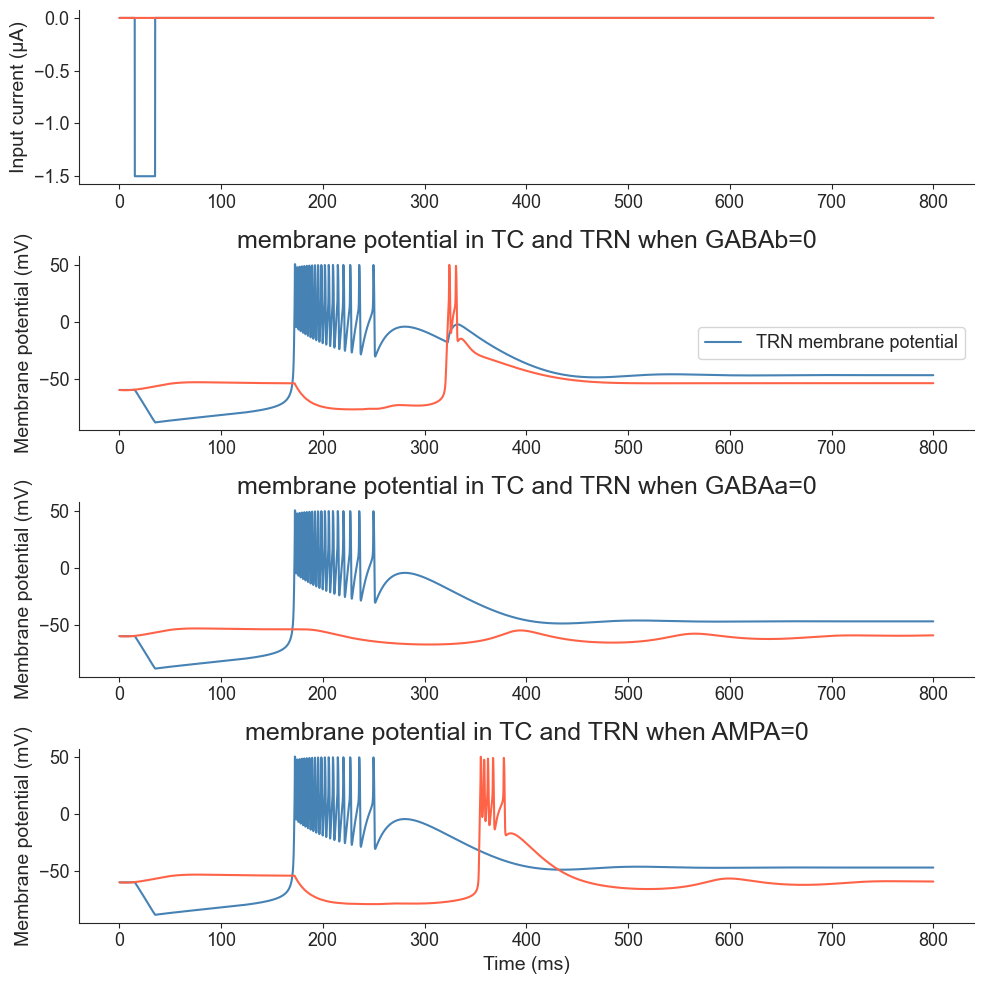

In [8]:
# def plot_voltage_current_TRN_TC(allvariables_TRN, allvariables_TC):

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(10,10), tight_layout=True) #7,5 is better for shorter plots


V_TRN_GABAb0= allvariables_TRN_GABAb0['Membrane potential (mV)']
I_TRN_GABAb0=allvariables_TRN_GABAb0['Injected current (μA)']

V_TC_GABAb0= allvariables_TC_GABAb0['Membrane potential (mV)']
I_TC_GABAb0=allvariables_TC_GABAb0['Injected current (μA)']


V_TRN_GABAa0= allvariables_TRN_GABAa0['Membrane potential (mV)']
I_TRN_GABAa0=allvariables_TRN_GABAa0['Injected current (μA)']

V_TC_GABAa0= allvariables_TC_GABAa0['Membrane potential (mV)']
I_TC_GABAa0=allvariables_TC_GABAa0['Injected current (μA)']


V_TRN_AMPA0= allvariables_TRN_AMPA0['Membrane potential (mV)']
I_TC_AMPA0=allvariables_TRN_AMPA0['Injected current (μA)']

V_TC_AMPA0= allvariables_TC_AMPA0['Membrane potential (mV)']
I_TC_AMPA0=allvariables_TC_AMPA0['Injected current (μA)']

plt.subplot(4,1,1)
plt.plot(T,I_TRN_GABAb0, color= 'steelblue')
plt.plot(T,I_TC_GABAb0, color = 'tomato' )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Input current (μA)')

plt.subplot(4,1,2)
plt.plot(T,V_TRN_GABAb0,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_GABAb0,label='', color='tomato')
plt.title('membrane potential in TC and TRN when GABAb=0')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend( loc='right')
plt.ylabel('Membrane potential (mV)')

plt.subplot(4,1,3)
plt.plot(T,V_TRN_GABAa0,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_GABAa0,label='', color='tomato')
plt.title('membrane potential in TC and TRN when GABAa=0')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Membrane potential (mV)')

plt.subplot(4,1,4)
plt.plot(T,V_TRN_AMPA0,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_AMPA0,label='', color='tomato')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('membrane potential in TC and TRN when AMPA=0')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
# plt.savefig('-ve input Regime 1 gLmaxTRN 0.09, V_L -77mV white.pdf', bbox_inches = 'tight')
# plt.savefig('zoom current pulse gLmax affects the frequency of bursts in TRN.pdf', bbox_inches = 'tight')

#### Experiment 2- Does the strength of GABAb affect the burst oscillations generation in TRN-TC? (figure 9A - thesis result)

In [ ]:

T= duration_of_sim(0, 3000, dt=0.01)

I_TRNinput= np.zeros(len(T))
I_TRNinput[15000:19000]= 2 # note 2 - regime 1 has higher gLmax value, therby more hyperolarised RMP and requires a positive pulse to trigger bursts

I_TCinput= np.zeros(len(T))

allvariables_TRN_GABAb1,allvariables_TC_GABAb1 =generateOscillationsTRN_TC(I_TRNinput,I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="regime 2", manipulation = "test GABAb_1", k =0)
allvariables_TRN_GABAb2, allvariables_TC_GABAb2=generateOscillationsTRN_TC(I_TRNinput,I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="regime 2",  manipulation = "test GABAb_2", k =0)
allvariables_TRN_GABAb3, allvariables_TC_GABAb3=generateOscillationsTRN_TC(I_TRNinput,I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="regime 2",  manipulation = "test GABAb_3", k =0)


In [ ]:
# def plot_voltage_current_TRN_TC(allvariables_TRN, allvariables_TC):

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(10,10), tight_layout=True) #7,5 is better for shorter plots


V_TRN_1= allvariables_TRN_GABAb1['Membrane potential (mV)']
I_TRN_1=allvariables_TRN_GABAb1['Injected current (μA)']

V_TC_1= allvariables_TC_GABAb1['Membrane potential (mV)']
I_TC_1=allvariables_TC_GABAb1['Injected current (μA)']


V_TRN_2= allvariables_TRN_GABAb2['Membrane potential (mV)']
V_TC_2= allvariables_TC_GABAb2['Membrane potential (mV)']



V_TRN_3= allvariables_TRN_GABAb3['Membrane potential (mV)']
V_TC_3= allvariables_TC_GABAb3['Membrane potential (mV)']



plt.subplot(4,1,1)
plt.title('membrane potential in TC and TRN with different background currents')
plt.plot(T,I_TRN_1, color= 'steelblue')
plt.plot(T,I_TC_1, color = 'tomato' )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Input current (μA)')



plt.subplot(4,1,2)
plt.plot(T,V_TRN_1,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_1,label='', color='tomato')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend( loc='right')
plt.ylabel('Membrane potential (mV)')


plt.subplot(4,1,3)
plt.plot(T,V_TRN_2,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_2,label='', color='tomato')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Membrane potential (mV)')

plt.subplot(4,1,4)
plt.plot(T,V_TRN_3,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_3,label='', color='tomato')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.title('membrane potential in TC and TRN when AMPA=0')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')

# plt.savefig('-ve input Regime 1 gLmaxTRN 0.09, V_L -77mV white.pdf', bbox_inches = 'tight')
# plt.savefig('zoom current pulse gLmax affects the frequency of bursts in TRN.pdf', bbox_inches = 'tight')

#### Experiment 3 - Effect of background currents in TRN and TC on the properties of burst oscillations or spindles (Figure 9B - thesis results)

In [ ]:

T= duration_of_sim(0, 6000, dt=0.01)

I_TRNinput1= 0.1*np.ones(len(T))
I_TRNinput2= 0.15*np.ones(len(T))
I_TRNinput3= 0.25*np.ones(len(T))
# I_TRNinput1[1500:3500]= 2 # note 2 - regime 1 has lower gLmax value, therby more hyperolarised RMP and requires a poasitive pulse to trigger bursts
# I_TRNinput2[1500:3500]= 2
# I_TRNinput3[1500:3500]= 2

I_TCinput1= -0.45*np.ones(len(T))
I_TCinput2= -0.35*np.ones(len(T))
I_TCinput3= -0.1*np.ones(len(T))

allvariables_TRN_1,allvariables_TC_1 =generateOscillationsTRN_TC(I_TRNinput1,I_TCinput1, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="regime 2",  manipulation = "standard", k =0)
allvariables_TRN_2, allvariables_TC_2=generateOscillationsTRN_TC(I_TRNinput1,I_TCinput2, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="regime 2",  manipulation = "standard", k=0)
allvariables_TRN_3, allvariables_TC_3=generateOscillationsTRN_TC(I_TRNinput2,I_TCinput3, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="regime 2",   manipulation = "standard", k=0)
allvariables_TRN_4, allvariables_TC_4=generateOscillationsTRN_TC(I_TRNinput3,I_TCinput3, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="regime 2",  manipulation = "standard", k=0)


In [ ]:
# def plot_voltage_current_TRN_TC(allvariables_TRN, allvariables_TC):

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(10,20), tight_layout=True) #7,5 is better for shorter plots


V_TRN_1= allvariables_TRN_1['Membrane potential (mV)']
I_TRN_1=allvariables_TRN_1['Injected current (μA)']

V_TC_1= allvariables_TC_1['Membrane potential (mV)']
I_TC_1=allvariables_TC_1['Injected current (μA)']


V_TRN_2= allvariables_TRN_2['Membrane potential (mV)']
I_TRN_2=allvariables_TRN_2['Injected current (μA)']

V_TC_2= allvariables_TC_2['Membrane potential (mV)']
I_TC_2=allvariables_TC_2['Injected current (μA)']


V_TRN_3= allvariables_TRN_3['Membrane potential (mV)']
I_TRN_3=allvariables_TRN_3['Injected current (μA)']

V_TC_3= allvariables_TC_3['Membrane potential (mV)']
I_TC_3=allvariables_TC_3['Injected current (μA)']


V_TRN_4= allvariables_TRN_3['Membrane potential (mV)']
I_TRN_4=allvariables_TRN_3['Injected current (μA)']

V_TC_4= allvariables_TC_4['Membrane potential (mV)']
I_TC_4=allvariables_TC_4['Injected current (μA)']

plt.subplot(8,1,1)
plt.title('membrane potential in TC and TRN with different background currents')
plt.plot(T,I_TRN_1, color= 'steelblue')
plt.plot(T,I_TC_1, color = 'tomato' )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Input current (μA)')



plt.subplot(8,1,2)
plt.plot(T,V_TRN_1,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_1,label='', color='tomato')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend( loc='right')
plt.ylabel('Membrane potential (mV)')

plt.subplot(8,1,3)
plt.plot(T,I_TRN_2, color= 'steelblue')
plt.plot(T,I_TC_2, color = 'tomato' )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Input current (μA)')


plt.subplot(8,1,4)
plt.plot(T,V_TRN_2,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_2,label='', color='tomato')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Membrane potential (mV)')

plt.subplot(8,1,5)
plt.plot(T,I_TRN_3, color= 'steelblue')
plt.plot(T,I_TC_3, color = 'tomato' )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Input current (μA)')

plt.subplot(8,1,6)
plt.plot(T,V_TRN_3,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_3,label='', color='tomato')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.title('membrane potential in TC and TRN when AMPA=0')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')


plt.subplot(8,1,7)
plt.plot(T,I_TRN_4, color= 'steelblue')
plt.plot(T,I_TC_4, color = 'tomato' )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Input current (μA)')

plt.subplot(8,1,8)
plt.plot(T,V_TRN_4,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_4,label='', color='tomato')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.title('membrane potential in TC and TRN when AMPA=0')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
# plt.savefig('-ve input Regime 1 gLmaxTRN 0.09, V_L -77mV white.pdf', bbox_inches = 'tight')
# plt.savefig('zoom current pulse gLmax affects the frequency of bursts in TRN.pdf', bbox_inches = 'tight')

#### Experiment 4: change gT values to see if that affects the burtsing properties of TRN-TC two cell spindles (Figure 10 thesis results)

In [13]:
T= duration_of_sim(0, 1000, dt=0.01)

I_TCinputT= 0*np.ones(len(T))
I_TCinputT[15000:17000]= -1.5

I_TRNinputT = np.zeros(len(T))


In [ ]:

allvariables_TRN_gT2, allvariables_TC_gT2 =generateOscillationsTRN_TC(I_TRNinputT, I_TCinputT, T,C_m, dt=0.01, regime_name_TRN="regime 1_v2", regime_name_TC="test gT2", manipulation = "standard", k =0)

allvariables_TRN_gT15, allvariables_TC_gT15 =generateOscillationsTRN_TC(I_TRNinputT,I_TCinputT, T,C_m, dt=0.01, regime_name_TRN="regime 1_v2", regime_name_TC="test gT1", manipulation = "standard", k =0)

In [ ]:
# def plot_voltage_current_TRN_TC(allvariables_TRN, allvariables_TC):

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(10,5), tight_layout=True) #7,5 is better for shorter plots


V_TRN_1= allvariables_TRN_gT15['Membrane potential (mV)']
I_TRN_1=allvariables_TRN_gT15['Injected current (μA)']

V_TC_1= allvariables_TC_gT15['Membrane potential (mV)']
I_TC_1=allvariables_TC_gT15['Injected current (μA)']


V_TRN_2= allvariables_TRN_gT2['Membrane potential (mV)']
V_TC_2= allvariables_TC_gT2['Membrane potential (mV)']




plt.subplot(3,1,1)
plt.plot(T,I_TRN_1, color= 'steelblue')
plt.plot(T,I_TC_1, color = 'tomato' )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Input current (μA)')


plt.subplot(3,1,2)
plt.plot(T,V_TRN_1,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_1,label='', color='tomato')
plt.title('membrane potential in TC and TRN with gT in TC as 1.5 mS/cm2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend( loc='right')
plt.ylabel('Membrane potential (mV)')

plt.subplot(3,1,3)
plt.plot(T,V_TRN_2,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_2,label='', color='tomato')
plt.title('membrane potential in TC and TRN with gT in TC as 2.0 mS/cm2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Membrane potential (mV)')


#### Characterize the synpatic LFP and membrane potential to get burst intervals and inter speindle intrevals 

In [16]:
import pandas as pd

In [17]:
def get_inter_spike_burst_intervals_and_burstLatency(VTRN1, VTC1, VTRN2, VTC2, stimulus_input_time):


    spike_train0, spike_time0= generatespikes(V_pre= VTRN2, V_th=25, T =T, dt=0.01)

    spike_train1, spike_time1= generatespikes(V_pre=VTC2, V_th=25, T =T, dt=0.01)

    spike_train2, spike_time2= generatespikes(V_pre=VTRN1, V_th=25, T =T, dt=0.01)

    spike_train3, spike_time3= generatespikes(V_pre=VTC1, V_th=25, T =T, dt=0.01)


    # latency to first burst starting from the end of the stimulus time --> this is the definition of burst latency

    lat_to_spike0= spike_time0[0]
    lat_to_spike1= spike_time1[0]
    lat_to_spike2= spike_time2[0]
    lat_to_spike3= spike_time3[0]
    print(lat_to_spike0, lat_to_spike1, lat_to_spike2, lat_to_spike3)


    tagsk=[]
    tag1=['TRN-control']
    tag2=['TC-control']
    tag3=['TRN-test']
    tag4=['TC-test']

    tagsk=np.append(tag1, tag2)
    tagsk=np.append(tagsk, tag3)
    tagsk=np.append(tagsk, tag4)
 
    lat_to_burst=[]
    lat_to_burst=np.append(lat_to_spike0 - stimulus_input_time, lat_to_spike1-stimulus_input_time)
    lat_to_burst=np.append(lat_to_burst, lat_to_spike2-stimulus_input_time)
    lat_to_burst=np.append(lat_to_burst, lat_to_spike3-stimulus_input_time)

    latency_burst_gx= {'Latency to burst (ms)':lat_to_burst, '': tagsk }

    data_lat_burst_gx= pd.DataFrame(latency_burst_gx, columns= ['Latency to burst (ms)', '']) 
    print(data_lat_burst_gx)

    isi_0=[]
    isi_1=[]
    isi_2=[]
    isi_3=[]
    # isi_4=[]


    isi_0 = np.diff(spike_time0)
    isi_1 = np.diff(spike_time1)
    isi_2 = np.diff(spike_time2)
    isi_3 = np.diff(spike_time3)



    ## to gte the number of spikes per burst, first get the index where the new bursts starts by checking is the inter spike interval exceeds a certain value, here 100 ms and then count the number of spikes in this location to get spikes per burst
    # isi_4 = np.diff(spike_time4)
    idx0 = np.where(isi_0>100)
    ibi_0 = isi_0[idx0]
    print(idx0)
    id0=np.where(isi_0<100)
    isi_0=isi_0[id0]

    idx1 = np.where(isi_1>100)
    ibi_1 = isi_1[idx1]
    print(idx1)
    id1=np.where(isi_1<100)
    isi_1=isi_1[id1]

    idx2 = np.where(isi_2>100)
    ibi_2 = isi_2[idx2]
    print(idx2)
    id2=np.where(isi_2<100)
    isi_2=isi_2[id2]

    idx3 = np.where(isi_3>100)
    ibi_3 = isi_3[idx3]
    print(idx3)
    id3=np.where(isi_3<100)
    isi_3=isi_3[id3]

    return data_lat_burst_gx, isi_0, isi_1, isi_2, isi_3, ibi_0, ibi_1, ibi_2, ibi_3, idx0, idx1, idx2, idx3

In [18]:
data_lat_burst_gT, isi_0, isi_1, isi_2, isi_3, ibi_0, ibi_1, ibi_2, ibi_3,  idx0, idx1, idx2, idx3 = get_inter_spike_burst_intervals_and_burstLatency(V_TRN_1, V_TC_1, V_TRN_2, V_TC_2, stimulus_input_time = 170)

235.59 233.23000000000002 247.55 245.45000000000002
   Latency to burst (ms)             
0                  65.59  TRN-control
1                  63.23   TC-control
2                  77.55     TRN-test
3                  75.45      TC-test
(array([11, 18, 25, 32], dtype=int64),)
(array([1, 3, 4, 5], dtype=int64),)
(array([11, 21, 31], dtype=int64),)
(array([1, 2, 3], dtype=int64),)


In [ ]:
## plot latency to burst

sns.barplot( x = '', y = 'Latency to burst (ms)',
              data = data_lat_burst_gT)
              
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
# sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels

plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.ylim(20,80)

# plt.savefig('3. effect of gT-TC values on laetncy of first per burst in TRN and TC.pdf')

In [20]:

def get_numberSpikes_per_burst( idx0, idx1, idx2, idx3):

    ## number of spikes per burst

    nspk_burst0=[]

    nspk_burst1=[]

    nspk_burst2=[]

    nspk_burst3=[]


    nspk_burst0= np.diff(idx0)

    nspk_burst1= np.diff(idx1)

    nspk_burst2= np.diff(idx2)

    nspk_burst3= np.diff(idx3)


    ## add these values to a dataframe for plotting them later
    nspk_values=[]

    nspk_values=np.append(nspk_burst0, nspk_burst1)
    nspk_values=np.append(nspk_values, nspk_burst2)
    nspk_values=np.append(nspk_values, nspk_burst3)



    nspk_tags=[]
    tagsk=[]
    tag1=['TRN-control']
    tag2=['TC-control']
    tag3=['TRN-test']
    tag4=['TC-test']

    tagsk=np.append(tag1, tag2)
    tagsk=np.append(tagsk, tag3)
    tagsk=np.append(tagsk, tag4)

    length= [np.size(nspk_burst0), np.size(nspk_burst1), np.size(nspk_burst2), np.size(nspk_burst3)]
    j=0
    i=0

    for j in range(len(tagsk)):
            for i in range(length[j]):
                    nspk_tags+= [tagsk[j]]
            
    # print(len(nspk_tags))
    nspk_burst_gT= {'Number of spikes per burst':nspk_values, 'gTmax TC (mS/cm2)': nspk_tags }
    # print(nspk_burst_gT)

    data_nspk_gT= pd.DataFrame(nspk_burst_gT, columns= ['Number of spikes per burst', 'gTmax TC (mS/cm2)']) 
    return data_nspk_gT, tagsk, nspk_burst0, nspk_burst1, nspk_burst2, nspk_burst3

In [21]:
data_nspk_gT, tagsk, nspk_burst0, nspk_burst1, nspk_burst2, nspk_burst3 = get_numberSpikes_per_burst( idx0, idx1, idx2, idx3)

In [ ]:
mean_nspk_burst0= np.mean(nspk_burst0)
mean_nspk_burst1= np.mean(nspk_burst1)
mean_nspk_burst2= np.mean(nspk_burst2)
mean_nspk_burst3= np.mean(nspk_burst3)

avg_nspk_values=[]
avg_nspk_values=np.append(mean_nspk_burst0, mean_nspk_burst1)
avg_nspk_values=np.append(avg_nspk_values, mean_nspk_burst2)
avg_nspk_values=np.append(avg_nspk_values, mean_nspk_burst3)

print(avg_nspk_values)

mean_nspk_burst_gT= {'Average spikes per burst':avg_nspk_values, '': tagsk }

data_avg_nspk_gT= pd.DataFrame(mean_nspk_burst_gT, columns= ['Average spikes per burst', '']) 
print(data_avg_nspk_gT)

sns.barplot( x = '', y = 'Average spikes per burst',
              data = data_avg_nspk_gT)
              
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
# sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels

plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]

# plt.savefig(' effect of gT-TC values on number of spikes per burst in TRN and TC.pdf')

#### Finally, get the intersynaptic intervals  

In [23]:
# inter synaptic total interval / 'LFP'

gTtestibi=[]
gTcontrolibi=[]

gTtestibi= (ibi_2 + ibi_3)/2

gTcontrolibi= (ibi_0[0:28] +ibi_1)/2

In [24]:
gTtestibi


array([205.755, 202.22 , 199.26 ])

In [25]:
gTcontrolibi

array([153.83 , 147.585, 153.62 , 153.485])

In [26]:
isyni_values=[]
isyni_values= np.append(gTcontrolibi, gTtestibi)
print(len(isyni_values))

isyni_tags=[]
tags_=[]
tag1=['2.0']
tag2=['1.5']

tags_=np.append(tag1, tag2)

l3= [len(gTcontrolibi), len(gTtestibi)]

for j in range(len(tags_)):
        for i in range(l3[j]):
                isyni_tags+= [tags_[j]]
        
print(isyni_tags)
inter_syn_interval_gT= {'Inter syn interval (ms)':isyni_values, 'gTmax TC (mS/cm2)': isyni_tags }
# print(inter_syn_interval_gT)

data_isyni= pd.DataFrame(inter_syn_interval_gT, columns= ['gTmax TC (mS/cm2)', 'Inter syn interval (ms)']) 
data_isyni
# data_isyni = data_isyni.drop(24)

7
['2.0', '2.0', '2.0', '2.0', '1.5', '1.5', '1.5']


,gTmax TC (mS/cm2),Inter syn interval (ms)
0,2.0,153.830
1,2.0,147.585
2,2.0,153.620
3,2.0,153.485
4,1.5,205.755
5,1.5,202.220
6,1.5,199.260


In [ ]:
sns.swarmplot( x = 'gTmax TC (mS/cm2)', y = 'Inter syn interval (ms)',
              data = data_isyni, size=7)

sns.despine()
## this plot reqires more data points --> perhaps run the simulation for longer duration
# plt.savefig(' 2.effect of gT-TC values on inter synaptic current interval .pdf')

### Experiment: intrinsic currents role 
- effect of different gH values in TC to see how it effects the two- cell spindle properties (Figure 11 Meera's thesis results)

In [ ]:
T= duration_of_sim(0, 4000, dt=0.01)

I_TRNinputT= 0.2*np.ones(len(T))


I_TCinputT = np.zeros(len(T))

allvariables_TRN_gH0, allvariables_TC_gH0 =generateOscillationsTRN_TC(I_TRNinputT, I_TCinputT, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test gH1", manipulation = "standard", k=0)
allvariables_TRN_gH1, allvariables_TC_gH1 =generateOscillationsTRN_TC(I_TRNinputT, I_TCinputT, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test gH2", manipulation = "standard", k=0)
allvariables_TRN_gH15, allvariables_TC_gH15 =generateOscillationsTRN_TC(I_TRNinputT, I_TCinputT, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test gH3", manipulation = "standard", k=0)
allvariables_TRN_gH2, allvariables_TC_gH2 =generateOscillationsTRN_TC(I_TRNinputT,  I_TCinputT, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test gH4", manipulation = "standard", k=0)

Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

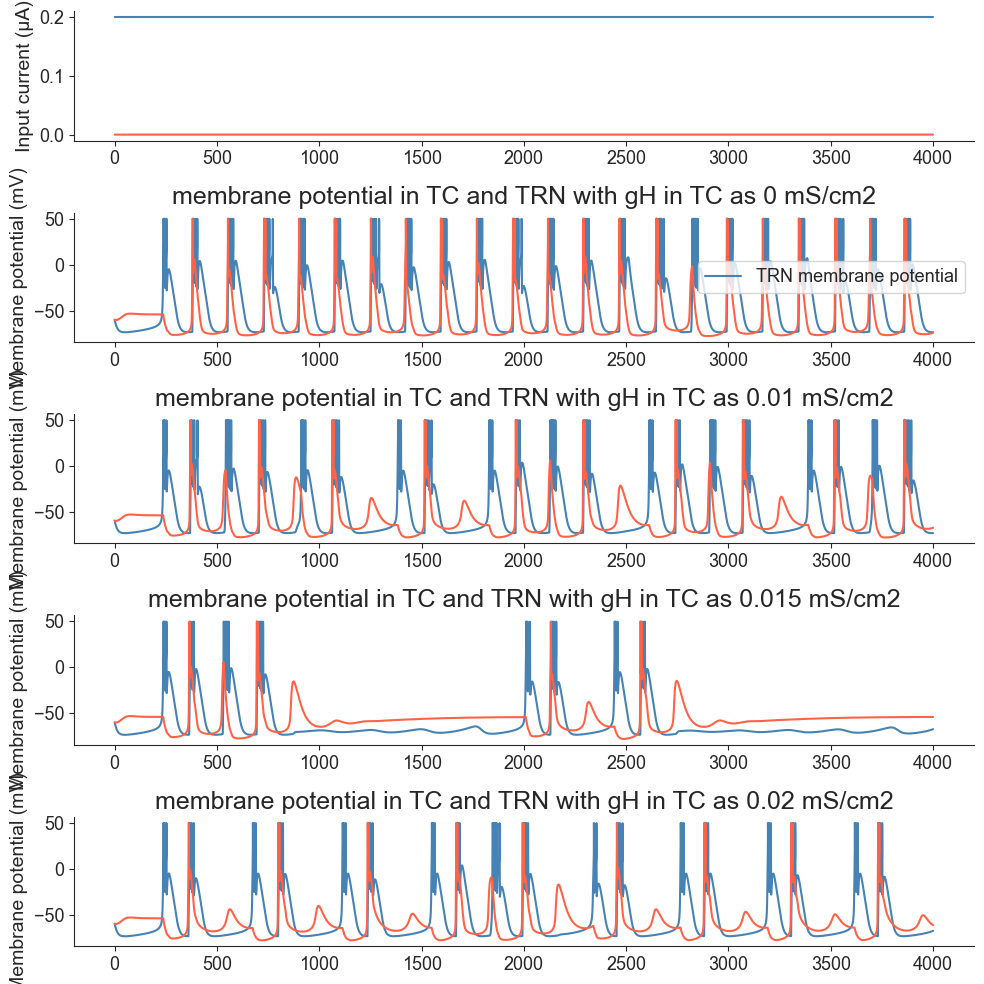

In [29]:
# def plot_voltage_current_TRN_TC(allvariables_TRN, allvariables_TC):

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(10,10), tight_layout=True) #7,5 is better for shorter plots


V_TRN_1= allvariables_TRN_gH0['Membrane potential (mV)']
I_TRN_1=allvariables_TRN_gH0['Injected current (μA)']

V_TC_1= allvariables_TC_gH0['Membrane potential (mV)']
I_TC_1=allvariables_TC_gH0['Injected current (μA)']


V_TRN_2= allvariables_TRN_gH1['Membrane potential (mV)']
V_TC_2= allvariables_TC_gH1['Membrane potential (mV)']


V_TRN_3= allvariables_TRN_gH15['Membrane potential (mV)']
V_TC_3= allvariables_TC_gH15['Membrane potential (mV)']

V_TRN_4= allvariables_TRN_gH2['Membrane potential (mV)']
V_TC_4= allvariables_TC_gH2['Membrane potential (mV)']


plt.subplot(5,1,1)
plt.plot(T,I_TRN_1, color= 'steelblue')
plt.plot(T,I_TC_1, color = 'tomato' )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Input current (μA)')


plt.subplot(5,1,2)
plt.plot(T,V_TRN_1,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_1,label='', color='tomato')
plt.title('membrane potential in TC and TRN with gH in TC as 0 mS/cm2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend( loc='right')
plt.ylabel('Membrane potential (mV)')

plt.subplot(5,1,3)
plt.plot(T,V_TRN_2,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_2,label='', color='tomato')
plt.title('membrane potential in TC and TRN with gH in TC as 0.01 mS/cm2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Membrane potential (mV)')

plt.subplot(5,1,4)
plt.plot(T,V_TRN_3,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_3,label='', color='tomato')
plt.title('membrane potential in TC and TRN with gH in TC as 0.015 mS/cm2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Membrane potential (mV)')

plt.subplot(5,1,5)
plt.plot(T,V_TRN_4,label='TRN membrane potential', color='steelblue')
plt.plot(T,V_TC_4,label='', color='tomato')
plt.title('membrane potential in TC and TRN with gH in TC as 0.02 mS/cm2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Membrane potential (mV)')

### Effect of intrinsic current on synaptic current : gh effect on I_AMPA, and afterdepolarization ( Mel's lab report)

In [30]:
T= duration_of_sim(0,4000,0.01)
I_TRNinput= 0.2*np.ones(len(T))
I_TCinput= 0*np.ones(len(T))

In [ ]:
TRN_variables17, TC_variables17 =generateOscillationsTRN_TC(I_TRNinput, I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test_gH", manipulation = "standard", k=4)
TRN_variables15, TC_variables15 =generateOscillationsTRN_TC(I_TRNinput, I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test_gH", manipulation = "standard", k=3)
TRN_variables0, TC_variables0 =generateOscillationsTRN_TC(I_TRNinput, I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test_gH", manipulation = "standard", k=0)
TRN_variables20, TC_variables20 =generateOscillationsTRN_TC(I_TRNinput,  I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test_gH", manipulation = "standard", k=5)

<Figure size 640x480 with 0 Axes>

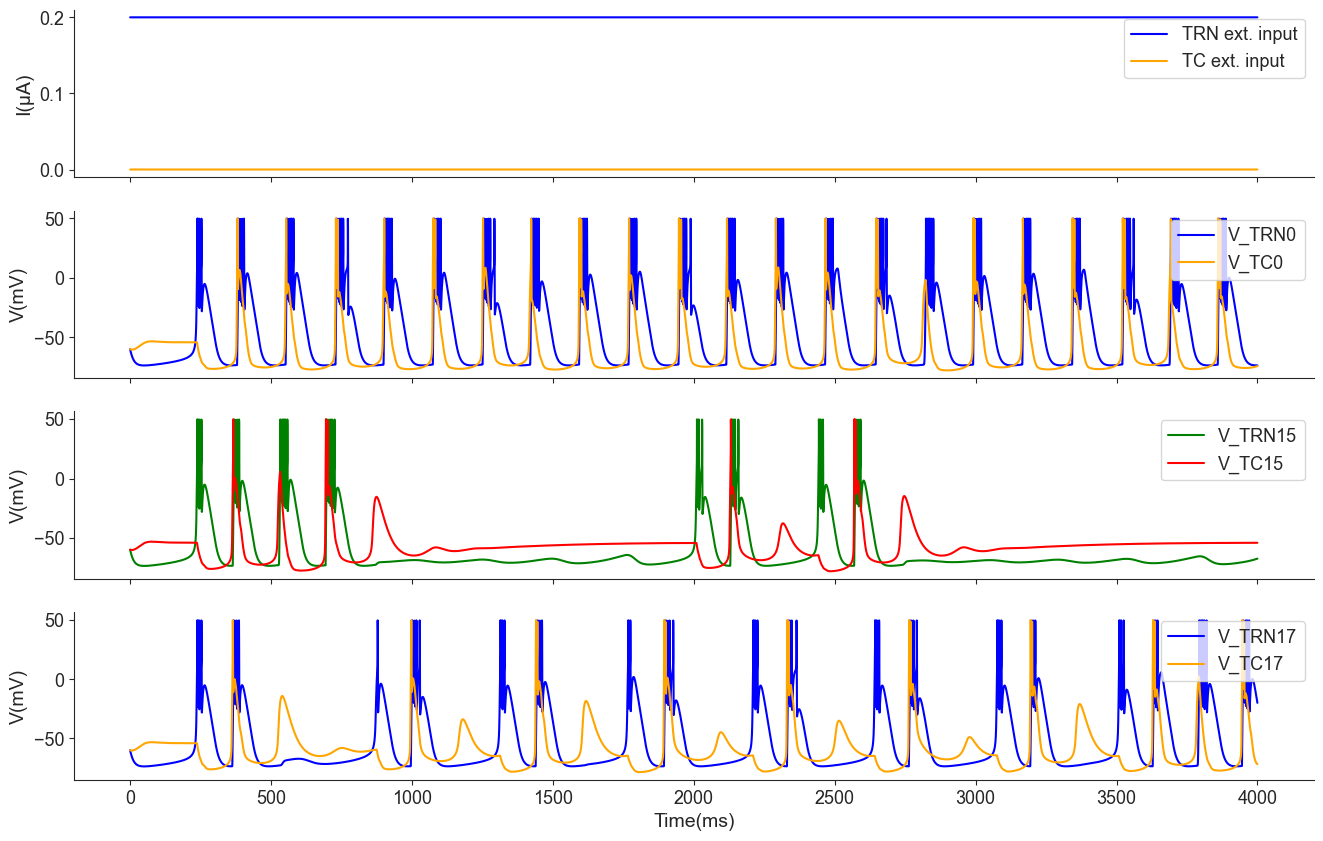

In [32]:
import seaborn as sns
V_TC15= TC_variables15['Membrane potential (mV)']
V_trn15= TRN_variables15['Membrane potential (mV)']
V_TC17= TC_variables17['Membrane potential (mV)']
V_trn17= TRN_variables17['Membrane potential (mV)']
V_TC0= TC_variables0['Membrane potential (mV)']
V_trn0= TRN_variables0['Membrane potential (mV)']

I_GABAa15= TC_variables15['I_GABAa']
I_GABAb15= TC_variables15['I_GABAb']
I_AMPA15= TRN_variables15['I_AMPA']
I_h_15=TC_variables15['I_h (nA)']
I_GABAa17= TC_variables17['I_GABAa']
I_GABAb17= TC_variables17['I_GABAb']
I_AMPA17= TRN_variables17['I_AMPA']
I_h_17=TC_variables17['I_h (nA)']

# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]


plt.subplots(4,1, figsize=(16,10))
plt.subplot(4,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend(loc=1)
plt.plot(T, I_TCinput, label= 'TC ext. input',c='orange' )
plt.legend()
plt.ylabel('I(μA)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.subplot(4,1,2)

plt.plot(T,V_trn0, label= 'V_TRN0', c='blue')
plt.plot(T, V_TC0, label= 'V_TC0', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('V(mV)')
plt.legend(loc=1)


plt.subplot(4,1,3)

plt.plot(T,V_trn15, label= 'V_TRN15', c='green')
plt.plot(T, V_TC15, label= 'V_TC15', c='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('V(mV)')
plt.legend(loc=1)

plt.subplot(4,1,4)
plt.plot(T,V_trn17, label= 'V_TRN17', c='blue')
plt.plot(T, V_TC17, label= 'V_TC17', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Time(ms)')
plt.ylabel('V(mV)')
plt.legend(loc=1)

In [ ]:
# this block of code zooms in to the intrinsic and synaptic currents

s_AMPA17 = TRN_variables17['s_AMPA']
V_trn17= TRN_variables17['Membrane potential (mV)']

V_TC17= TC_variables17['Membrane potential (mV)']
V_trn17= TRN_variables17['Membrane potential (mV)']
I_GABAa17= TC_variables17['I_GABAa']
I_GABAb17= TC_variables17['I_GABAb']
I_AMPA17= TRN_variables17['I_AMPA']
I_h_17=TC_variables17['I_h (nA)']
I_syn_TC17= I_GABAa17 + I_GABAb17
I_syn_TRN17= I_AMPA17

s_AMPA15 = TRN_variables15['s_AMPA']
V_TC15= TC_variables15['Membrane potential (mV)']
V_trn15= TRN_variables15['Membrane potential (mV)']
I_GABAa15= TC_variables15['I_GABAa']
I_GABAb15= TC_variables15['I_GABAb']
I_AMPA15= TRN_variables15['I_AMPA']
I_h_15=TC_variables15['I_h (nA)']
I_syn_TC15= I_GABAa15 + I_GABAb15
I_syn_TRN15= I_AMPA15

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0].plot(T, V_trn17, label = 'V_TRN17')
ax[0].plot(T, -I_h_17*1000, label = 'Ih*1000')
#ax[0].plot(T, -64*np.ones(len(T)), label = 'V=-64')
# ax[0].plot(T, V_TC17, label = 'V_TC17')
ax[0].plot(T, -I_AMPA17*50, label = 'I_AMPA*50')
ax[0].plot(T, I_syn_TC17*50, label = 'I_GABA*50')
ax[0].plot(T, s_AMPA17*500, label = 's_AMPA*500')
ax[0].set_xlabel('Time(ms)')
# ax[0].set_ylabel('I(nA)*multiplier')
ax[0].legend(loc = 9, fontsize='xx-small')
ax[0].set_xlim(300, 800)
ax[0].set_ylim(-40, 100)


# ax[1].plot(T, V_trn15, label = 'V_TRN15')
ax[1].plot(T, -I_h_15*1000, label = 'Ih*1000')
# ax[1].plot(T, -64*np.ones(len(T)),label ='V=-64')
# ax[1].plot(T, V_TC15, label = 'V_TC15')
ax[1].plot(T, -I_AMPA15*50, label = 'I_AMPA*50')
ax[1].plot(T, I_syn_TC15*50, label = 'I_GABA*50')
ax[1].plot(T, s_AMPA15*500, label = 's_AMPA*500')
ax[1].set_xlabel('Time(ms)')
# ax[1].set_ylabel('')
ax[1].legend(loc = 9, fontsize='xx-small')
ax[1].set_xlim(600, 1100)
ax[1].set_ylim(-40, 100)

#### change I_AMPA to see if depolarization still persits in gh=0.017

In [ ]:
TRN_variables17A, TC_variables17A =generateOscillationsTRN_TC(I_TRNinput, I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test_gH", manipulation = "standard", k=4, modify_AMPA = True  )
TRN_variables15A, TC_variables15A =generateOscillationsTRN_TC(I_TRNinput, I_TCinput, T,C_m, dt=0.01, regime_name_TRN="regime 1", regime_name_TC="test_gH", manipulation = "standard", k=3, modify_AMPA = True )


Voila gh=0.017 has afterdepolarization


<Figure size 640x480 with 0 Axes>

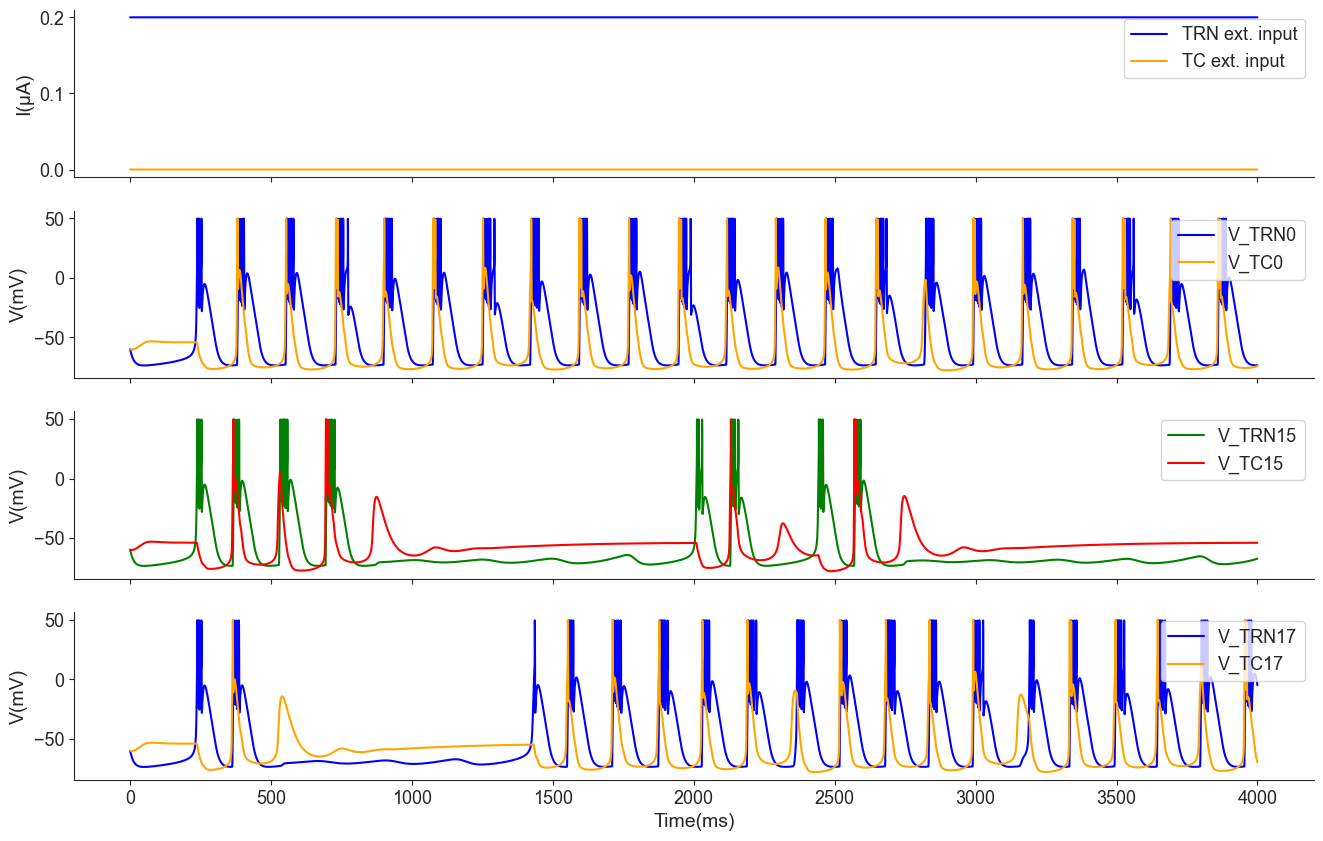

In [35]:
import seaborn as sns
V_TC15= TC_variables15A['Membrane potential (mV)']
V_trn15= TRN_variables15A['Membrane potential (mV)']
V_TC17= TC_variables17A['Membrane potential (mV)']
V_trn17= TRN_variables17A['Membrane potential (mV)']
V_TC0= TC_variables0['Membrane potential (mV)']
V_trn0= TRN_variables0['Membrane potential (mV)']

I_GABAa15= TC_variables15['I_GABAa']
I_GABAb15= TC_variables15['I_GABAb']
I_AMPA15= TRN_variables15['I_AMPA']
I_h_15=TC_variables15['I_h (nA)']
I_GABAa17= TC_variables17['I_GABAa']
I_GABAb17= TC_variables17['I_GABAb']
I_AMPA17= TRN_variables17['I_AMPA']
I_h_17=TC_variables17['I_h (nA)']

# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]


plt.subplots(4,1, figsize=(16,10))
plt.subplot(4,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend(loc=1)
# plt.xlim(0,800)
plt.plot(T, I_TCinput, label= 'TC ext. input',c='orange' )
plt.legend()
# plt.xlim(0,800)
plt.ylabel('I(μA)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.title(' timely revival of bursts to mimic sppindles - input 155ms for 20 ms and 6s for 20 ms ')
plt.subplot(4,1,2)

plt.plot(T,V_trn0, label= 'V_TRN0', c='blue')
plt.plot(T, V_TC0, label= 'V_TC0', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('V(mV)')
plt.legend(loc=1)


plt.subplot(4,1,3)

plt.plot(T,V_trn15, label= 'V_TRN15', c='green')
plt.plot(T, V_TC15, label= 'V_TC15', c='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('V(mV)')
plt.legend(loc=1)


plt.subplot(4,1,4)
plt.plot(T,V_trn17, label= 'V_TRN17', c='blue')
plt.plot(T, V_TC17, label= 'V_TC17', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.xticks(color='w')
plt.xlabel('Time(ms)')
plt.ylabel('V(mV)')
plt.legend(loc=1)

print("Voila gh=0.017 has afterdepolarization")

In [ ]:
# plot intrinsic and synaptic currents again
s_AMPA17 = TRN_variables17A['s_AMPA']
V_trn17= TRN_variables17A['Membrane potential (mV)']

I_syn_TRN17= TRN_variables17A['I_AMPA']
V_TC17= TC_variables17A['Membrane potential (mV)']
V_trn17= TRN_variables17A['Membrane potential (mV)']
I_GABAa17= TC_variables17A['I_GABAa']
I_GABAb17= TC_variables17A['I_GABAb']
I_syn_TC17= I_GABAa17 + I_GABAb17
I_AMPA17= TRN_variables17A['I_AMPA']
I_h_17=TC_variables17A['I_h (nA)']

s_AMPA15 = TRN_variables15A['s_AMPA']
V_TC15= TC_variables15A['Membrane potential (mV)']
V_trn15= TRN_variables15A['Membrane potential (mV)']
I_GABAa15= TC_variables15A['I_GABAa']
I_GABAb15= TC_variables15A['I_GABAb']
I_AMPA15= TRN_variables15A['I_AMPA']
I_h_15=TC_variables15A['I_h (nA)']
I_syn_TC15= I_GABAa15 + I_GABAb15
I_syn_TRN15= I_AMPA15

# plt.plot(T, V_trn17, label = 'V_TRN17')
# plt.plot(T, -I_h_17*1000, label = 'Ih')
# plt.plot(T, -64*np.ones(len(T)), label = 'V=-64')
# plt.plot(T, V_TC17, label = 'V_TC17')
# plt.plot(T, -I_AMPA17*100, label = 'IAMPA*100')
# plt.plot(T, I_syn_TC17*100, label = 'IGABA*100')
# plt.legend(loc = 9, fontsize='small')
# plt.xlim(300, 960)
# plt.ylim(-90, 70)
fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0].plot(T, V_trn17, label = 'V_TRN17')
ax[0].plot(T, -I_h_17*1000, label = 'Ih*1000')
#ax[0].plot(T, -64*np.ones(len(T)), label = 'V=-64')
# ax[0].plot(T, V_TC17, label = 'V_TC17')
ax[0].plot(T, -I_AMPA17*50, label = 'I_AMPA*50')
ax[0].plot(T, I_syn_TC17*50, label = 'I_GABA*50')
ax[0].plot(T, s_AMPA17*500, label = 's_AMPA*500')
ax[0].set_xlabel('Time(ms)')
# ax[0].set_ylabel('I(nA)*multiplier')
ax[0].legend(loc = 9, fontsize='xx-small')
ax[0].set_xlim(300, 800)
ax[0].set_ylim(-40, 100)


# ax[1].plot(T, V_trn15, label = 'V_TRN15')
ax[1].plot(T, -I_h_15*1000, label = 'Ih*1000')
# ax[1].plot(T, -64*np.ones(len(T)),label ='V=-64')
# ax[1].plot(T, V_TC15, label = 'V_TC15')
ax[1].plot(T, -I_AMPA15*50, label = 'I_AMPA*50')
ax[1].plot(T, I_syn_TC15*50, label = 'I_GABA*50')
ax[1].plot(T, s_AMPA15*500, label = 's_AMPA*500')
ax[1].set_xlabel('Time(ms)')
# ax[1].set_ylabel('')
ax[1].legend(loc = 9, fontsize='xx-small')
ax[1].set_xlim(600, 1100)
ax[1].set_ylim(-40, 100)

### Experiment -Three cells connected circuit 

In [37]:
T= duration_of_sim(0,3000,0.01)
n=2
I_TRNinput= 0*np.ones((len(T),n))
I_TCinput= 0*np.ones((len(T),n))

I_TRNinput[:,0]= 0.2
# I_TCinput[15000:17000,1]= -1.5
# I_TRNinput[98000:100000]=-1.7
# I_TRNinput[900000:92000]=-3.5

nTRN_variables, nTC_variables = generateOscillations_nTRN_nTC(I_TC= I_TCinput, I_TRN=I_TRNinput, T=T, C_m=1, dt=0.01, n=n)


[0.00000000e+00 1.29150769e-14 2.57188858e-14 ... 5.64357921e+00
 5.64410127e+00 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 3.60824933e-73 ... 6.83557188e-01
 6.83551304e-01 0.00000000e+00]


Text(0.5, 0, 'time(ms)')

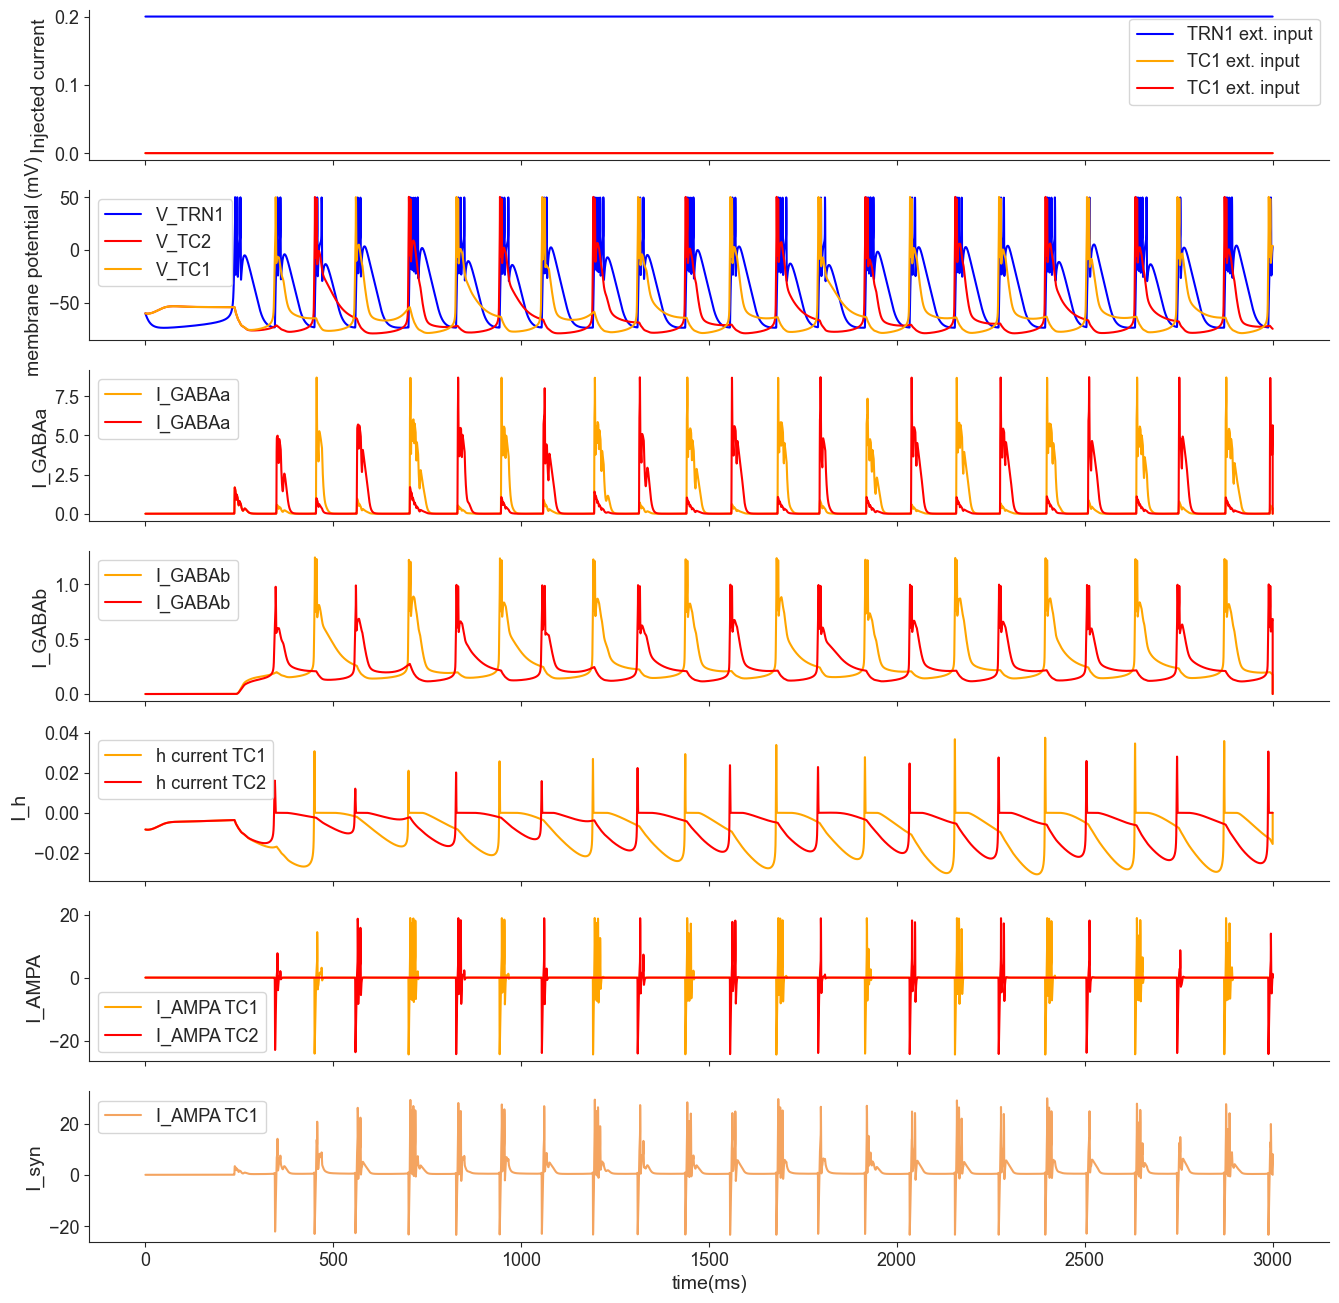

In [38]:
V_TC= nTC_variables['Membrane potential (mV)']
V_trn= nTRN_variables['Membrane potential (mV)']
I_GABAa= nTC_variables['I_GABAa'] 
print(I_GABAa[:,1])
I_GABAb= nTC_variables['I_GABAb'] 
print(I_GABAb[:,1])
I_AMPA= nTRN_variables['I_AMPAmethod1']
I_h=nTC_variables['I_h (nA)']
# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']

plt.subplots(7,1, figsize=(16,16))
plt.subplot(7,1,1)
plt.plot(T, I_TRNinput[:,0], label= 'TRN1 ext. input',c='blue')
plt.legend()
# plt.plot(T, I_TRNinput[:,1], label= 'TRN2 ext. input',c='cyan')
# plt.legend()
plt.plot(T, I_TCinput[:,0], label= 'TC1 ext. input',c='orange' )
plt.legend()
plt.plot(T, I_TCinput[:,1], label= 'TC1 ext. input',c='red' )
plt.legend()
plt.ylabel('Injected current')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,2)
plt.plot(T,V_trn[:,0], label= 'V_TRN1', c='blue')
plt.legend()
plt.plot(T,V_TC[:,0], label= 'V_TC2', c='red')
plt.ylabel('membrane potential (mV)')
plt.legend()
plt.plot(T,V_TC[:,1], label= 'V_TC1', c='orange')
plt.ylabel('membrane potential (mV)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.legend()

# plt.plot(T,V_trn[:,1], label= 'V_TRN2', c='cyan')
# plt.legend()
plt.subplot(7,1,3)
plt.plot(T,I_GABAa[:,0], label= 'I_GABAa', c='orange')
plt.plot(T,I_GABAa[:,1], label= 'I_GABAa', c='red')
plt.ylabel('I_GABAa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.legend()

plt.subplot(7,1,4)
plt.plot(T,I_GABAb[:,0], label= 'I_GABAb', c='orange')
plt.plot(T,I_GABAb[:,1], label= 'I_GABAb', c='red')
plt.legend()
plt.ylabel('I_GABAb')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,5)
plt.plot(T,I_h[:,0],label='h current TC1', c='orange')
plt.legend()
plt.plot(T,I_h[:,1],label='h current TC2', c='red')
plt.legend()
plt.ylabel('I_h')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.plot(T,slow_h,label='slow component h current', c='orange')
# plt.legend()
# plt.ylabel('slow_h')
# plt.subplot(7,1,6)
# plt.plot(T,fast_h,label='fast component h current', c='orange')
# plt.legend()
# plt.ylabel('fast_h')
plt.subplot(7,1,6)
plt.plot(T,I_AMPA[:,0], label= 'I_AMPA TC1', c='orange')
plt.legend()
plt.plot(T,I_AMPA[:,1], label= 'I_AMPA TC2', c='red')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('I_AMPA')
plt.xlabel('time(ms)')

plt.subplot(7,1,7)
plt.plot(T,I_AMPA[:,0]+ I_AMPA[:,1] + I_GABAb[:,0]+I_GABAb[:,1]+I_GABAa[:,0] +I_GABAa[:,1], label= 'I_AMPA TC1', c='#F4A460')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('I_syn')
plt.xlabel('time(ms)')

# plt.savefig(' v2. 3 cell - 2 TC and TRN- successful -control .pdf')

##### reduce GABAb strength on one side of the connection --> only GABAb as that affects the latency we see between bursts as found  before in two cell-circuit

In [39]:
nTRN_variables_lowGabaB, nTC_variables_lowGabaB = generateOscillations_nTRN_nTC(I_TC= I_TCinput, I_TRN=I_TRNinput, T=T, C_m=1, dt=0.01, n=n)

In [ ]:
V_TC= nTC_variables_lowGabaB['Membrane potential (mV)']
V_trn= nTRN_variables_lowGabaB['Membrane potential (mV)']
I_GABAa= nTC_variables_lowGabaB['I_GABAa'] 
print(I_GABAa[:,1])
I_GABAb= nTC_variables_lowGabaB['I_GABAb'] 
print(I_GABAb[:,1])
I_AMPA= nTRN_variables_lowGabaB['I_AMPAmethod1']
I_h=nTC_variables_lowGabaB['I_h (nA)']
# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']

plt.subplots(7,1, figsize=(16,16))
plt.subplot(7,1,1)
plt.plot(T, I_TRNinput[:,0], label= 'TRN1 ext. input',c='blue')
plt.legend()
# plt.plot(T, I_TRNinput[:,1], label= 'TRN2 ext. input',c='cyan')
# plt.legend()
plt.plot(T, I_TCinput[:,0], label= 'TC1 ext. input',c='orange' )
plt.legend()
plt.plot(T, I_TCinput[:,1], label= 'TC1 ext. input',c='red' )
plt.legend()
plt.ylabel('Injected current')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,2)
plt.plot(T,V_trn[:,0], label= 'V_TRN1', c='blue')
plt.legend()
plt.plot(T,V_TC[:,0], label= 'V_TC2', c='red')
plt.ylabel('membrane potential (mV)')
plt.legend()
plt.plot(T,V_TC[:,1], label= 'V_TC1', c='orange')
plt.ylabel('membrane potential (mV)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.legend()

# plt.plot(T,V_trn[:,1], label= 'V_TRN2', c='cyan')
# plt.legend()
plt.subplot(7,1,3)
plt.plot(T,I_GABAa[:,0], label= 'I_GABAa', c='orange')
plt.plot(T,I_GABAa[:,1], label= 'I_GABAa', c='red')
plt.ylabel('I_GABAa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.legend()

plt.subplot(7,1,4)
plt.plot(T,I_GABAb[:,0], label= 'I_GABAb', c='orange')
plt.plot(T,I_GABAb[:,1], label= 'I_GABAb', c='red')
plt.legend()
plt.ylabel('I_GABAb')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,5)
plt.plot(T,I_h[:,0],label='h current TC1', c='orange')
plt.legend()
plt.plot(T,I_h[:,1],label='h current TC2', c='red')
plt.legend()
plt.ylabel('I_h')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.plot(T,slow_h,label='slow component h current', c='orange')
# plt.legend()
# plt.ylabel('slow_h')
# plt.subplot(7,1,6)
# plt.plot(T,fast_h,label='fast component h current', c='orange')
# plt.legend()
# plt.ylabel('fast_h')
plt.subplot(7,1,6)
plt.plot(T,I_AMPA[:,0], label= 'I_AMPA TC1', c='orange')
plt.legend()
plt.plot(T,I_AMPA[:,1], label= 'I_AMPA TC2', c='red')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('I_AMPA')
plt.xlabel('time(ms)')

plt.subplot(7,1,7)
plt.plot(T,I_AMPA[:,0]+ I_AMPA[:,1] + I_GABAb[:,0]+I_GABAb[:,1]+I_GABAa[:,0] +I_GABAa[:,1], label= 'I_AMPA TC1', c='#F4A460')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('I_syn')
plt.xlabel('time(ms)')

# plt.savefig(' v2. 3 cell - 2 TC and TRN- successful -control .pdf')